# Controlled-not Gate

This program simulates a CNOT Gate. \
Author: Míra Holeček \
Time: 13.8.2025 \
Note: Ensure you have installed the requirements.txt or environment.yml before running this notebook.

## Introduction

The controlled-NOT gate, also known as the controlled-x (CX) gate, acts on a pair of qubits, with one acting as control and the other as target. It performs a NOT on the target whenever the control is in state $|1\rangle$. 

If the control qubit is in a superposition, this gate creates entanglement.

All unitary circuits can be decomposed into single qubit gates and CNOT gates. Because the two-qubit CNOT gate costs much more time to execute on real hardware than single qubit gates, circuit cost is sometimes measured in the number of CNOT gates.

The matrix for this gate is:




\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix}








We will apply the CNOT gate to three pairs of qubits: (0,1), (2,3), (4,5), where the first qubit in each pair acts as the control and the second as the target.

Target qubits are all initialized in the state $|0\rangle$. Control qubits are initialized as follows:

Qubit 0: $|0\rangle$

Qubit 2: $\frac{1}{\sqrt{2}} \left( |0\rangle + |1\rangle \right)$

Qubit 4: $|1\rangle$

After applying the CNOT gates, the target qubits will be flipped if their corresponding control qubit is in the state $|1\rangle$ and the second and third qubit will be in superposition.

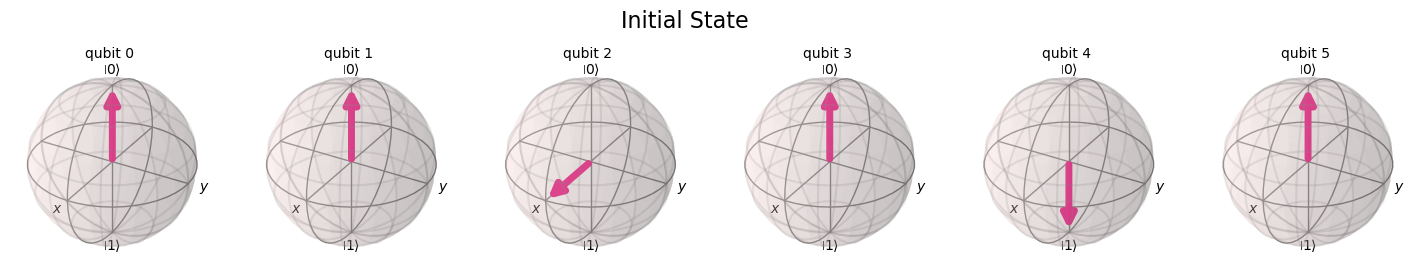

In [13]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(6, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)


circuit.h(qreg_q[2])
circuit.x(qreg_q[4])
plot_bloch_multivector(Statevector(circuit), title="Initial State", figsize=(3,3))

In [14]:
Statevector(circuit).draw("latex")

<IPython.core.display.Latex object>

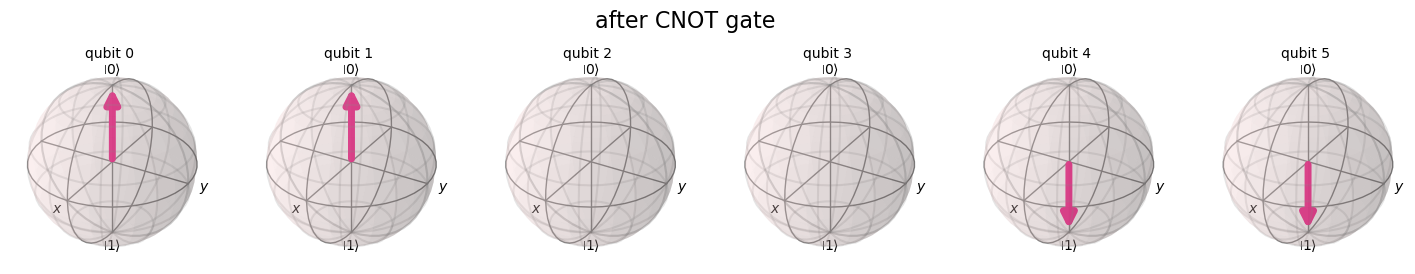

In [15]:
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[2], qreg_q[3])
circuit.cx(qreg_q[4], qreg_q[5])

plot_bloch_multivector(Statevector(circuit), title="after CNOT gate",figsize=(3,3)) 



$\text{CNOT} =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix}$



Qubits 0 and 1:

$\text{CNOT} \cdot
\begin{bmatrix}
1\\0\\0\\0
\end{bmatrix}
=\begin{bmatrix}
1\\0\\0\\0
\end{bmatrix}
\Rightarrow |0\rangle \otimes |0\rangle$

Qubits 2 and 3:

$\text{CNOT} \cdot
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1\\0\\1\\0
\end{bmatrix}=
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1\\0\\0\\1
\end{bmatrix}
\Rightarrow \frac{1}{\sqrt{2}}(|0\rangle \otimes |0\rangle + |1\rangle \otimes |1\rangle)$

Qubits 4 and 5:

$\text{CNOT} \cdot
\begin{bmatrix}
0\\0\\1\\0
\end{bmatrix}=
\begin{bmatrix}
0\\0\\0\\1
\end{bmatrix}
\Rightarrow |1\rangle \otimes |1\rangle$









In [16]:
Statevector(circuit).draw("latex")

<IPython.core.display.Latex object>

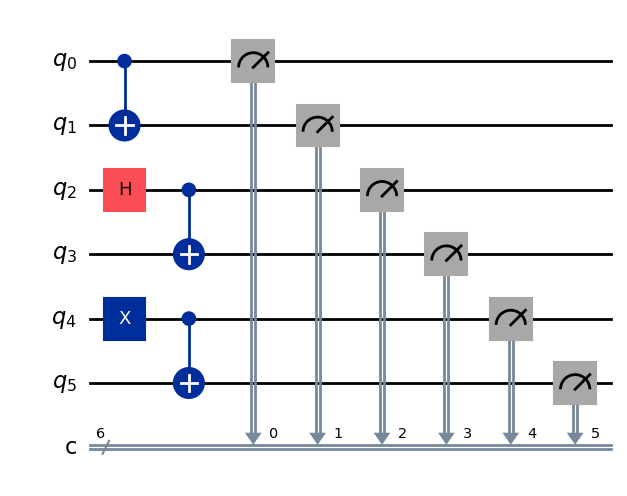

In [17]:
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.measure(qreg_q[3], creg_c[3])
circuit.measure(qreg_q[4], creg_c[4])
circuit.measure(qreg_q[5], creg_c[5])
circuit.draw("mpl", plot_barriers=False)

In [18]:
sim = AerSimulator(shots=5000)
result = sim.run(circuit).result()

print(result.get_counts(circuit))

{'111100': 2529, '110000': 2471}
